## Problem Statement

Predict the price of the Uber ride from a given pickup point to the agreed drop-off location.
Perform following tasks:
1. Pre-process the dataset.
2. Identify outliers.
3. Check the correlation.
4. Implement linear regression and random forest regression models.
5. Evaluate the models and compare their respective scores like R2, RMSE, etc.

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor

## Data Aquisition

Dataset link: https://www.kaggle.com/datasets/yasserh/uber-fares-dataset


In [3]:
from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"sam4524","key":"ffc777bbb089bf4fcbbaa8e99bb0f32f"}'}

In [4]:
# Kaggle API Configuration
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [5]:
!kaggle datasets download -d yasserh/uber-fares-dataset

Dataset URL: https://www.kaggle.com/datasets/yasserh/uber-fares-dataset
License(s): CC0-1.0
  0% 0.00/7.04M [00:00<?, ?B/s]
100% 7.04M/7.04M [00:00<00:00, 116MB/s]


In [6]:
!unzip uber-fares-dataset

Archive:  uber-fares-dataset.zip
  inflating: uber.csv                


## Data Exploration

In [7]:
# Read the csv datafile
df = pd.read_csv("uber.csv")

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


In [8]:
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


### Visualize

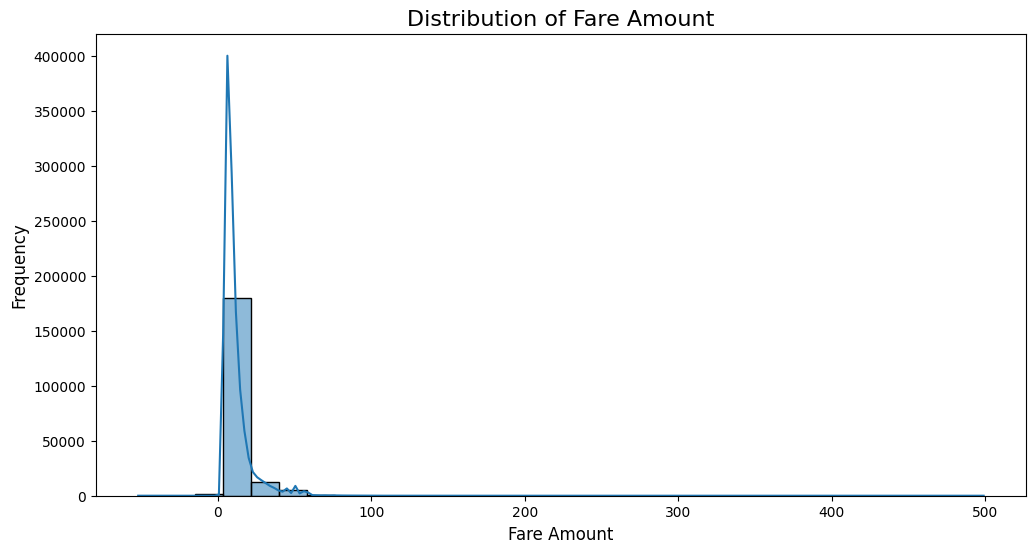

In [14]:
# Distribution plot
plt.figure(figsize=(12, 6))  # Increase figure size for better visibility
sns.histplot(data=df, x='fare_amount', kde=True, bins=30)
plt.title('Distribution of Fare Amount', fontsize=16)
plt.xlabel('Fare Amount', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

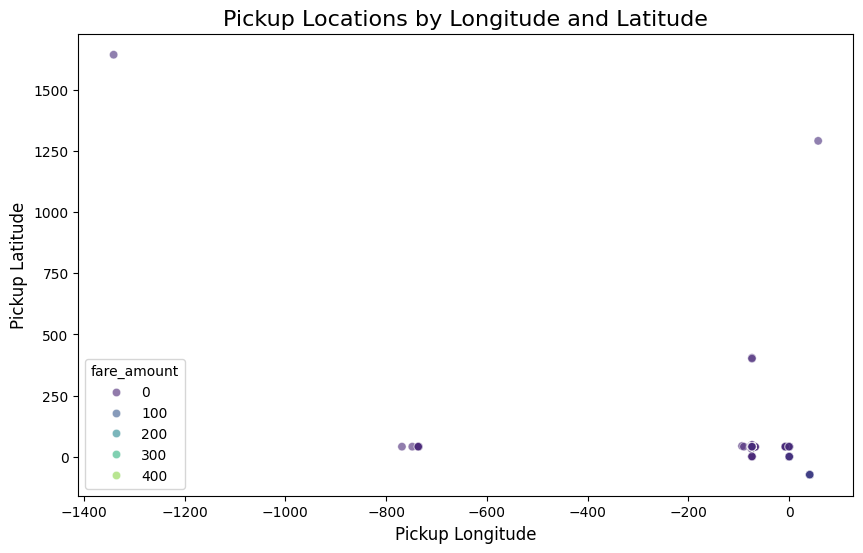

In [19]:
# Scatter Plot for pickup location
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='pickup_longitude', y='pickup_latitude', hue='fare_amount', palette='viridis', alpha=0.6)
plt.title('Pickup Locations by Longitude and Latitude', fontsize=16)
plt.xlabel('Pickup Longitude', fontsize=12)
plt.ylabel('Pickup Latitude', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

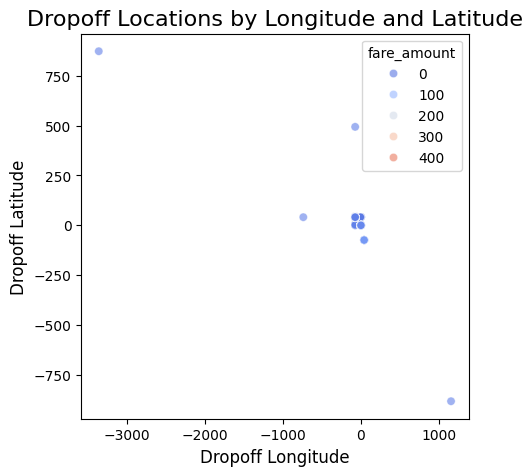

In [21]:
# Scatter plot for dropoff location
plt.figure(figsize=(5, 5))
sns.scatterplot(data=df, x='dropoff_longitude', y='dropoff_latitude', hue='fare_amount', palette='coolwarm', alpha=0.6)
plt.title('Dropoff Locations by Longitude and Latitude', fontsize=16)
plt.xlabel('Dropoff Longitude', fontsize=12)
plt.ylabel('Dropoff Latitude', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

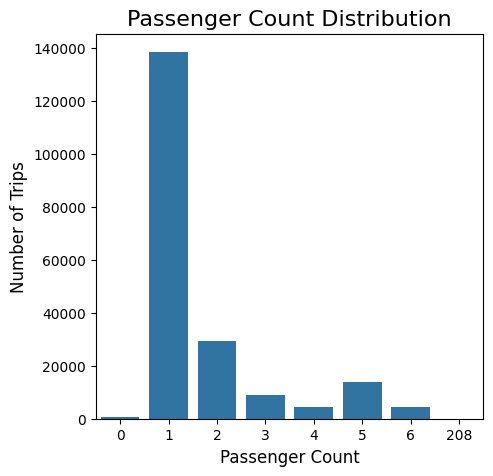

In [23]:
# Bar Plot for passenger_count
plt.figure(figsize=(5, 5))  # Adjust figure size
sns.countplot(data=df, x='passenger_count')
plt.title('Passenger Count Distribution', fontsize=16)
plt.xlabel('Passenger Count', fontsize=12)
plt.ylabel('Number of Trips', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

### Removing outliers

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.

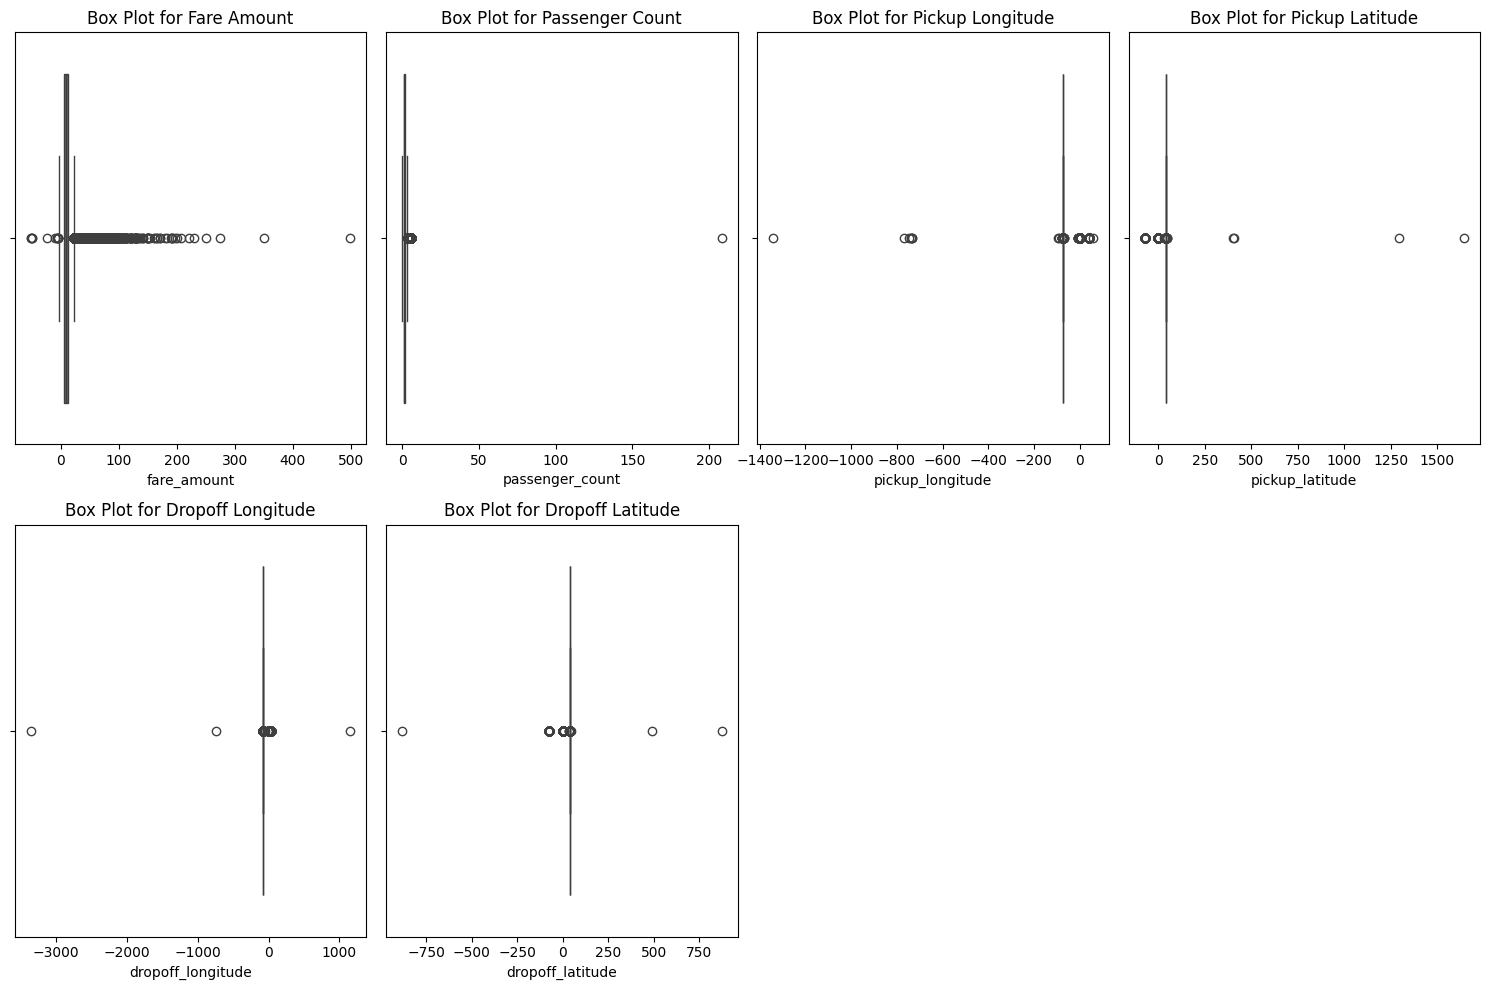

In [24]:
# Set up the matplotlib figure
plt.figure(figsize=(15, 10))

# Box plot for fare_amount
plt.subplot(2, 4, 1)
sns.boxplot(x=df['fare_amount'])
plt.title('Box Plot for Fare Amount')

# Box plot for passenger_count
plt.subplot(2, 4, 2)
sns.boxplot(x=df['passenger_count'])
plt.title('Box Plot for Passenger Count')

# Box plot for pickup_longitude
plt.subplot(2, 4, 3)
sns.boxplot(x=df['pickup_longitude'])
plt.title('Box Plot for Pickup Longitude')

# Box plot for pickup_latitude
plt.subplot(2, 4, 4)
sns.boxplot(x=df['pickup_latitude'])
plt.title('Box Plot for Pickup Latitude')

# Box plot for dropoff_longitude
plt.subplot(2, 4, 5)
sns.boxplot(x=df['dropoff_longitude'])
plt.title('Box Plot for Dropoff Longitude')

# Box plot for dropoff_latitude
plt.subplot(2, 4, 6)
sns.boxplot(x=df['dropoff_latitude'])
plt.title('Box Plot for Dropoff Latitude')

plt.tight_layout()
plt.show()

In [39]:
# Function to remove outliers
def remove_outliers(df: pd.DataFrame, column) -> pd.DataFrame:
  Q1 = df[column].quantile(0.25)
  Q3 = df[column].quantile(0.75)
  IQR = Q3 - Q1

  # Define the bounds
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR

  # Remove outliers
  df_no_outliers = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
  return df_no_outliers

# Columns to remove outliers from
columns_to_check = ['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'passenger_count']

# Remove outliers for each column
for col in columns_to_check:
  df = remove_outliers(df, col)

# Remove outliers for target column
df = df[(df["fare_amount"] <=100)]

In [40]:
# Save the cleaned dataset
df.to_csv('cleaned_dataset.csv', index=False)

In [41]:
cleaned_df = pd.read_csv("cleaned_dataset.csv")

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.

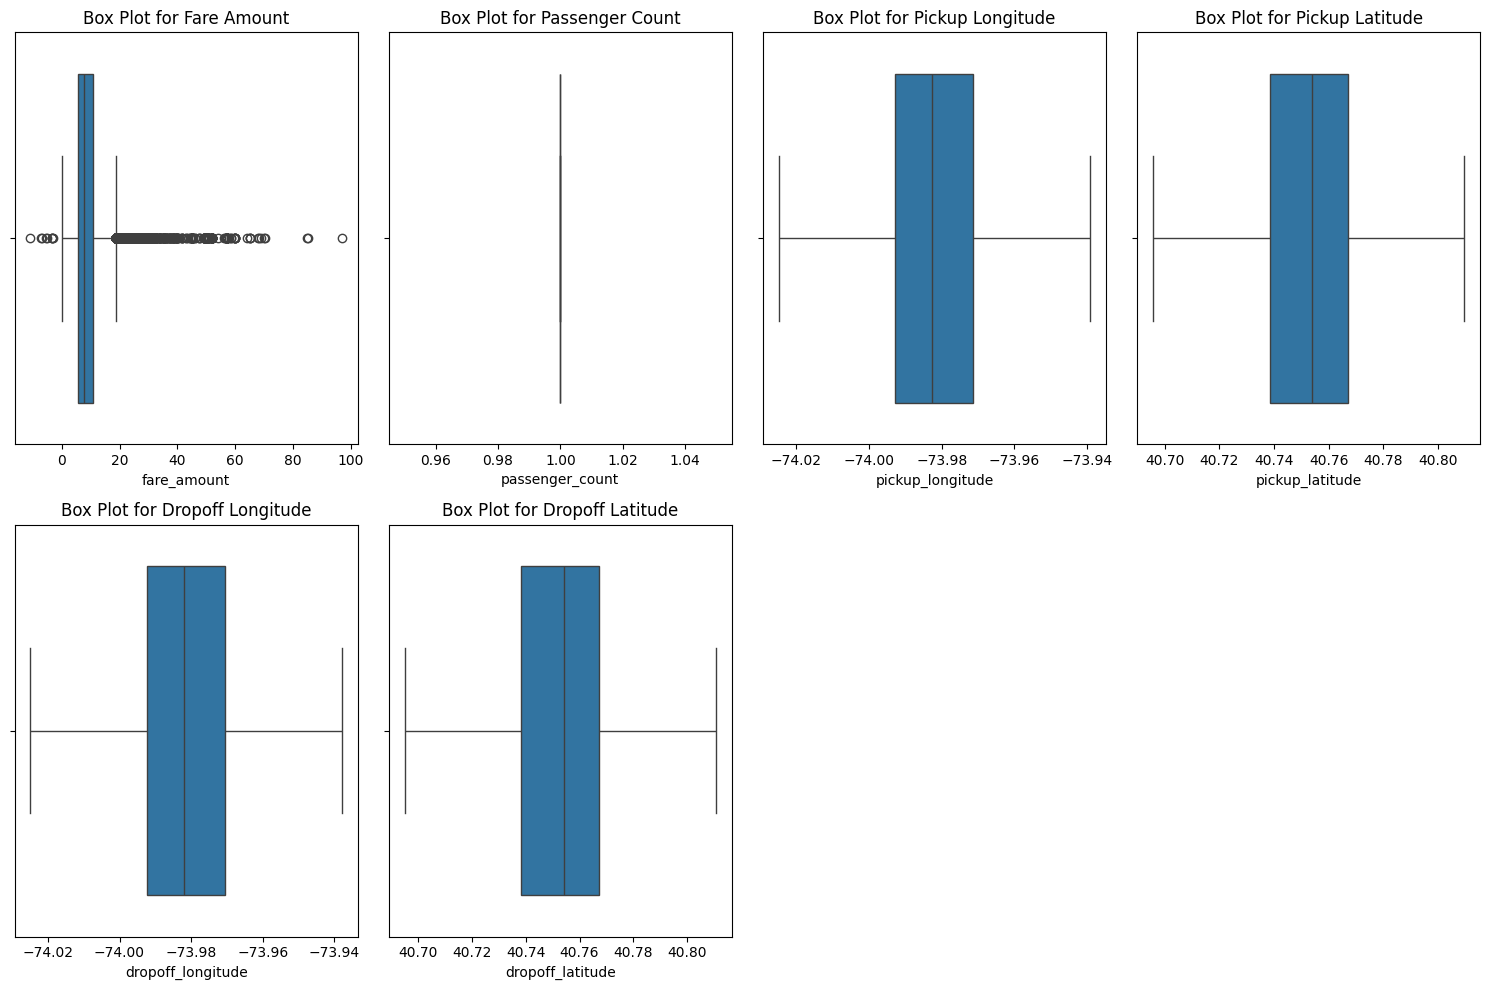

In [42]:
# Set up the matplotlib figure
plt.figure(figsize=(15, 10))

# Box plot for fare_amount
plt.subplot(2, 4, 1)
sns.boxplot(x=cleaned_df['fare_amount'])
plt.title('Box Plot for Fare Amount')

# Box plot for passenger_count
plt.subplot(2, 4, 2)
sns.boxplot(x=cleaned_df['passenger_count'])
plt.title('Box Plot for Passenger Count')

# Box plot for pickup_longitude
plt.subplot(2, 4, 3)
sns.boxplot(x=cleaned_df['pickup_longitude'])
plt.title('Box Plot for Pickup Longitude')

# Box plot for pickup_latitude
plt.subplot(2, 4, 4)
sns.boxplot(x=cleaned_df['pickup_latitude'])
plt.title('Box Plot for Pickup Latitude')

# Box plot for dropoff_longitude
plt.subplot(2, 4, 5)
sns.boxplot(x=cleaned_df['dropoff_longitude'])
plt.title('Box Plot for Dropoff Longitude')

# Box plot for dropoff_latitude
plt.subplot(2, 4, 6)
sns.boxplot(x=cleaned_df['dropoff_latitude'])
plt.title('Box Plot for Dropoff Latitude')

plt.tight_layout()
plt.show()

### Checking Correlation

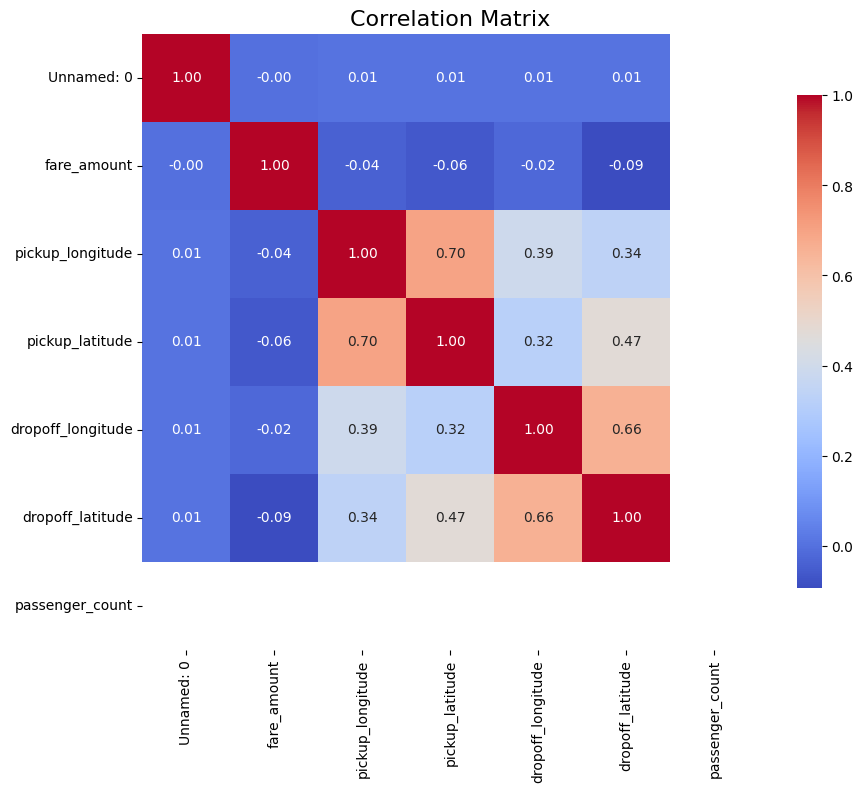

In [46]:
# Drop non-numeric columns
numeric_df = cleaned_df.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
corr_mat = numeric_df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Plot the correlation using heatmap
sns.heatmap(corr_mat, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})

# Set title
plt.title('Correlation Matrix', fontsize=16)

# Show the plot
plt.show()

In [50]:
# Creating Features and Labels
X = df[["pickup_longitude",	"pickup_latitude",	"dropoff_longitude",	"dropoff_latitude",	"passenger_count"]]
y = df["fare_amount"]

# Split the data into training and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of X_train: (92968, 5)
Shape of X_test: (23243, 5)
Shape of y_train: (92968,)
Shape of y_test: (23243,)


## Model Building

### Linear Regression model

In [65]:
# Initialize the Linear Regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Assuming y_test and y_pred are defined
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R² Score: {r2}")

Mean Absolute Error (MAE): 3.2898525988467457
Mean Squared Error (MSE): 20.907273771177874
Root Mean Squared Error (RMSE): 4.572447240939788
R² Score: 0.011967786655664336


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


### Random Forest Regressor

In [63]:
# Create the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Calculate MSE and R²
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R² Score: {r2}')

Mean Squared Error: 9.201159079012482
R² Score: 0.5651732660284641


## Predictions

In [73]:
input_data = {
    'pickup_longitude': -73.9857,  # Example longitude
    'pickup_latitude': 40.7484,     # Example latitude
    'dropoff_longitude': -73.9857,  # Example dropoff longitude
    'dropoff_latitude': 40.7484,     # Example dropoff latitude
    'passenger_count': 1              # Example passenger count
}
# Make predictions for linear regression model
predicted_fare_linear = model.predict(pd.DataFrame([input_data]))
print(f"Predicted Price is(Linear): {predicted_fare_linear[0]}")
# Make predictions for linear regression model
predicted_fare_rf = rf_model.predict(pd.DataFrame([input_data]))
print(f"Predicted Price is(RF): {predicted_fare_rf[0]}")

Predicted Price is(Linear): 8.920196516007763
Predicted Price is(RF): 6.611000000000001


In [72]:
input_data_1 = {
    'pickup_longitude': -73.9820,  # Example longitude
    'pickup_latitude': 40.7580,     # Example latitude
    'dropoff_longitude': -73.9750,  # Example dropoff longitude
    'dropoff_latitude': 40.7630,     # Example dropoff latitude
    'passenger_count': 2              # Example passenger count
}
# Make predictions for linear regression model
predicted_fare_linear = model.predict(pd.DataFrame([input_data_1]))
print(f"Predicted Price is(Linear): {predicted_fare_linear[0]}")
# Make predictions for linear regression model
predicted_fare_rf = rf_model.predict(pd.DataFrame([input_data_1]))
print(f"Predicted Price is(RF): {predicted_fare_rf[0]}")

Predicted Price is(Linear): 8.688900300471232
Predicted Price is(RF): 8.169


In [74]:
input_data_2 = {
    'pickup_longitude': -73.9855,  # Example longitude
    'pickup_latitude': 40.7479,     # Example latitude
    'dropoff_longitude': -73.9810,  # Example dropoff longitude
    'dropoff_latitude': 40.7580,     # Example dropoff latitude
    'passenger_count': 3              # Example passenger count
}
# Make predictions for linear regression model
predicted_fare_linear = model.predict(pd.DataFrame([input_data_2]))
print(f"Predicted Price is(Linear): {predicted_fare_linear[0]}")
# Make predictions for linear regression model
predicted_fare_rf = rf_model.predict(pd.DataFrame([input_data_2]))
print(f"Predicted Price is(RF): {predicted_fare_rf[0]}")

Predicted Price is(Linear): 8.75131365209927
Predicted Price is(RF): 7.114999999999998
